This problem is a binary classification problem which aims to predict loan repayment behaviour, specifically identifying potential ***defaulters*** and ***non-defaulters.***

So before diving in into model building lets first analyze and try to **understand data more clearly**.
We are going to use following libraries for **EDA**:

*   **Pandas** (for understanding data more clearly and also to do required manipulations like cleaning, statistical analysis, transformation etc..)
*   **Seaborn** (for visualizations)







In [63]:
import pandas as pd                    # importing pandas
df = pd.read_excel("train_data.xlsx")  # reading/loading data from excel file
df.head()                              # viewing first 5 records just to get sense of data

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [64]:
df.info()     # to get basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

so form basic information we got to know that there are 17 features in the dataset which are as follows:


*   int64 : {customer_id,  cibil_score,  total_no_of_acc,  loan_amnt,
 account_bal,  emp_length,  loan_status}
*   object : {sub_grade,  term,  home_ownership,  application_type,  verification_status,  object}
*   float : {annual_inc,  int_rate,  installment}
*   datetime : {transaction_date}










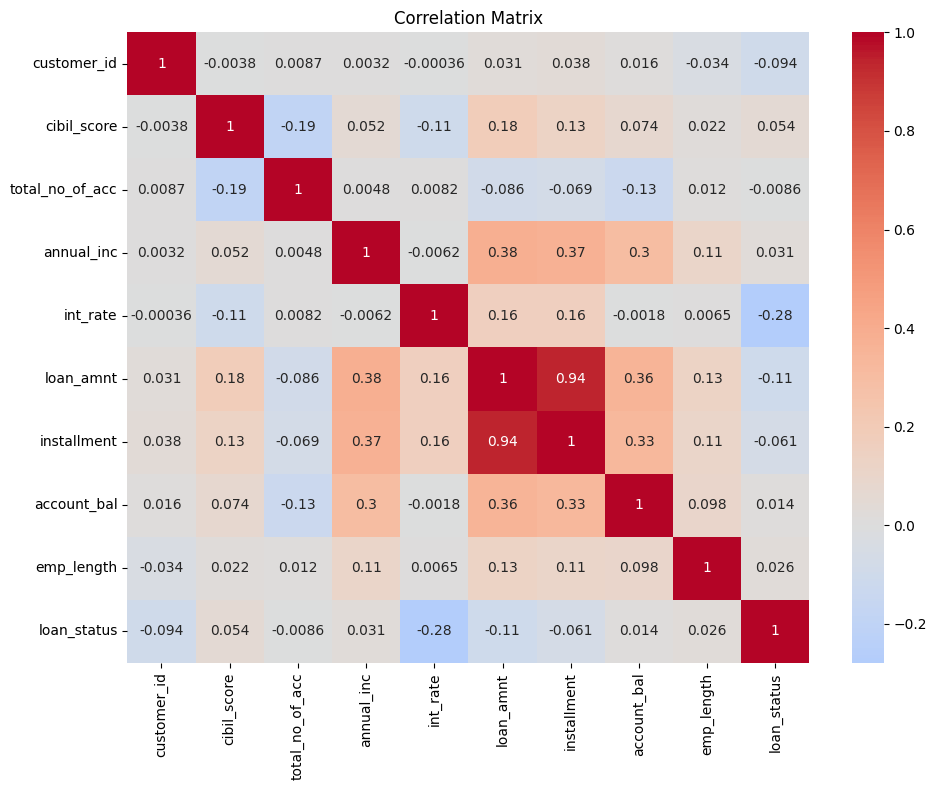

In [65]:
import seaborn as sns                                                      # importing seaborn
import matplotlib.pyplot as plt                                            # importing matplotlib

numerical_columns = list(df.select_dtypes(include=["number"]))             # fetching numerical features for calculating correlation
correlation_matrix = df[numerical_columns].corr()                          # correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)     # Plotting correlation heatmap
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



*   From Correlation matrix we got to know that **customer_id** is actually not contributing towards our decision of loan_status (*defaulters/non-defaulters*).
*   So we can drop **customer_id** from our dataset.



In [66]:
df = df.drop(columns=["customer_id"])     # to drop customer_id

In [67]:
df.head()

transaction_date sub_grade        term home_ownership  cibil_score  \
0       2014-01-01        C5   36 months       MORTGAGE          665   
1       2014-01-01        E5   36 months       MORTGAGE          660   
2       2014-01-01        D2   36 months       MORTGAGE          660   
3       2014-01-01        B4   36 months       MORTGAGE          690   
4       2014-01-01        C3   60 months       MORTGAGE          665   

   total_no_of_acc  annual_inc  int_rate             purpose  loan_amnt  \
0                9     70000.0     16.24  debt_consolidation       7200   
1                8     65000.0     23.40    home_improvement       6000   
2                7     73000.0     17.57               other       8000   
3                5    118000.0     12.85  debt_consolidation      10000   
4                5     63000.0     14.98  debt_consolidation      10000   

  application_type  installment verification_status  account_bal  emp_length  \
0       Individual       253.99            Verified         4648          11   
1       Individual       233.52     Source Verified        14051          11   
2       Individual       287.50            Verified        14885          11   
3       Individual       336.22     Source Verified         7542           2   
4       Individual       237.80            Verified         6318          11   

   loan_status  
0            0  
1            1  
2            0  
3            1  
4            0

In [68]:
categorical_columns = list(df.select_dtypes(include=["object"]))
print(categorical_columns)

['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']


Now lets analyze categorical features against loan_status

*sub_grade vs loan_status*

<Figure size 1200x800 with 0 Axes>

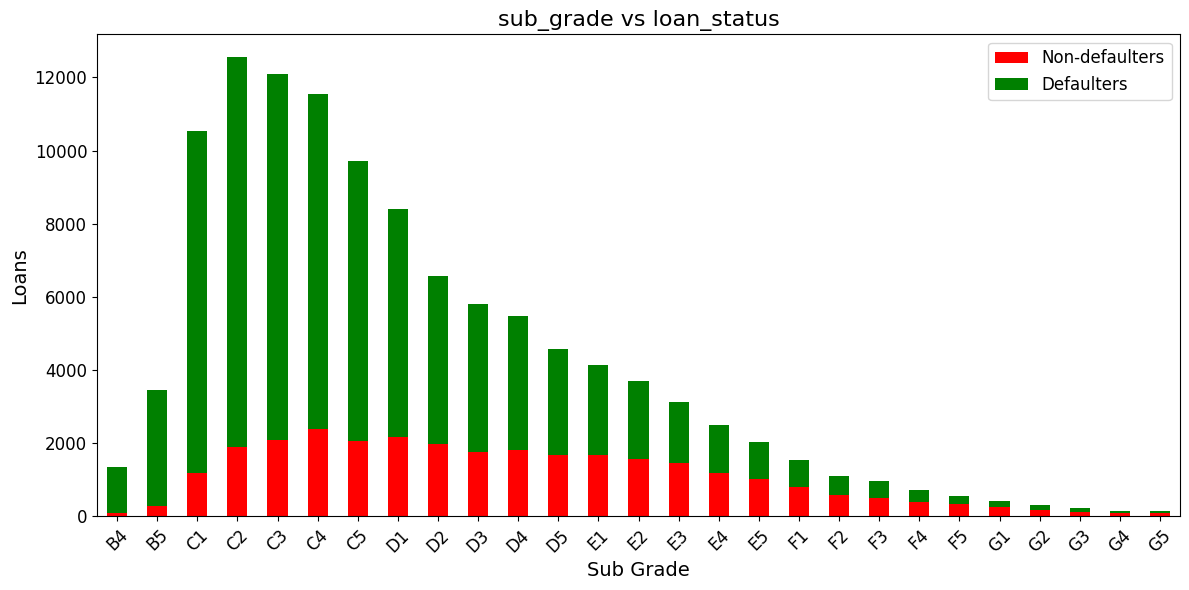

In [69]:

# Count the number of defaulters and non-defaulters for each sub_grade
status_counts = df.groupby(["sub_grade", "loan_status"]).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind="bar", stacked=True, color=["red", "green"], figsize=(12, 6))

# Add labels and title
plt.title("sub_grade vs loan_status", fontsize=16)           # title
plt.xlabel("Sub Grade", fontsize=14)                         # xlabel
plt.ylabel("Loans", fontsize=14)                             # ylabel
plt.xticks(rotation=45, fontsize=12)                         # lables/markers on axes of plot
plt.yticks(fontsize=12)                                      # lables/markers on axes of plot
plt.legend(["Non-defaulters", "Defaulters"], fontsize=12)    # legend (on top right corner of plot)
plt.tight_layout()

plt.show()



From the above plot we can observe that **C2** sub_grade has **maximum** defaulters and **minumum** defaulters between **G4 & G5**

*home_ownership vs loan_status*

<Figure size 1200x800 with 0 Axes>

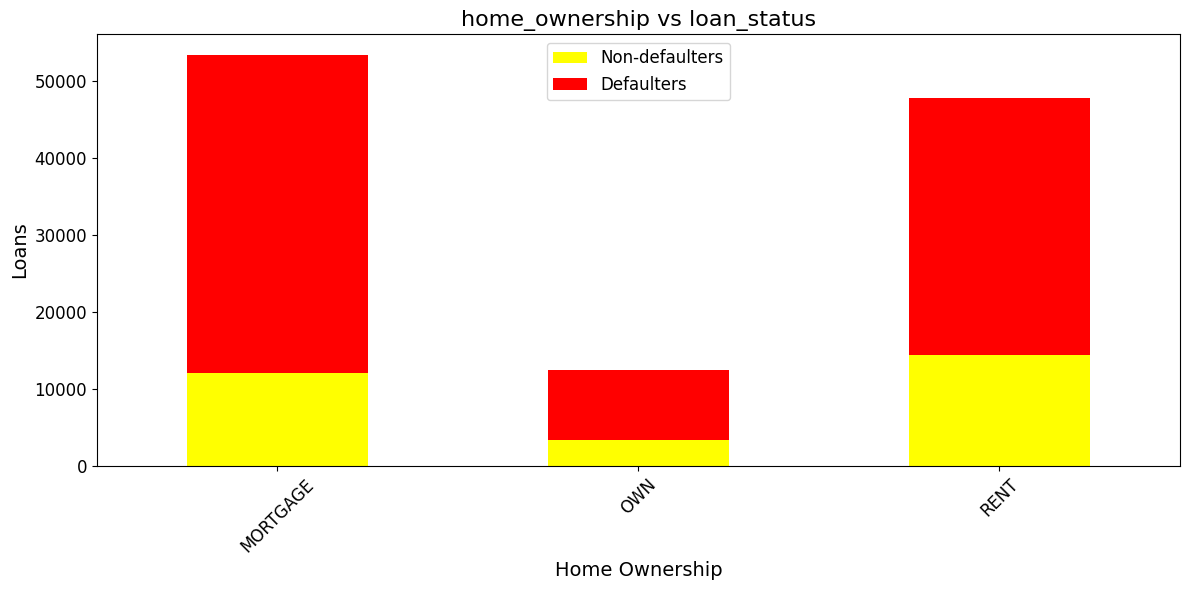

In [70]:
# Count the number of defaulters and non-defaulters for each home_ownership
status_counts = df.groupby(["home_ownership", "loan_status"]).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind="bar", stacked=True, color=["yellow", "red"], figsize=(12, 6))

# Add labels and title
plt.title("home_ownership vs loan_status", fontsize=16)           # title
plt.xlabel("Home Ownership", fontsize=14)                         # xlabel
plt.ylabel("Loans", fontsize=14)                                  # ylabel
plt.xticks(rotation=45, fontsize=12)                              # lables/markers on axes of plot
plt.yticks(fontsize=12)                                           # lables/markers on axes of plot
plt.legend(["Non-defaulters", "Defaulters"], fontsize=12)         # legend (on top right corner of plot)
plt.tight_layout()

plt.show()


*application_type vs loan_status*

<Figure size 1200x800 with 0 Axes>

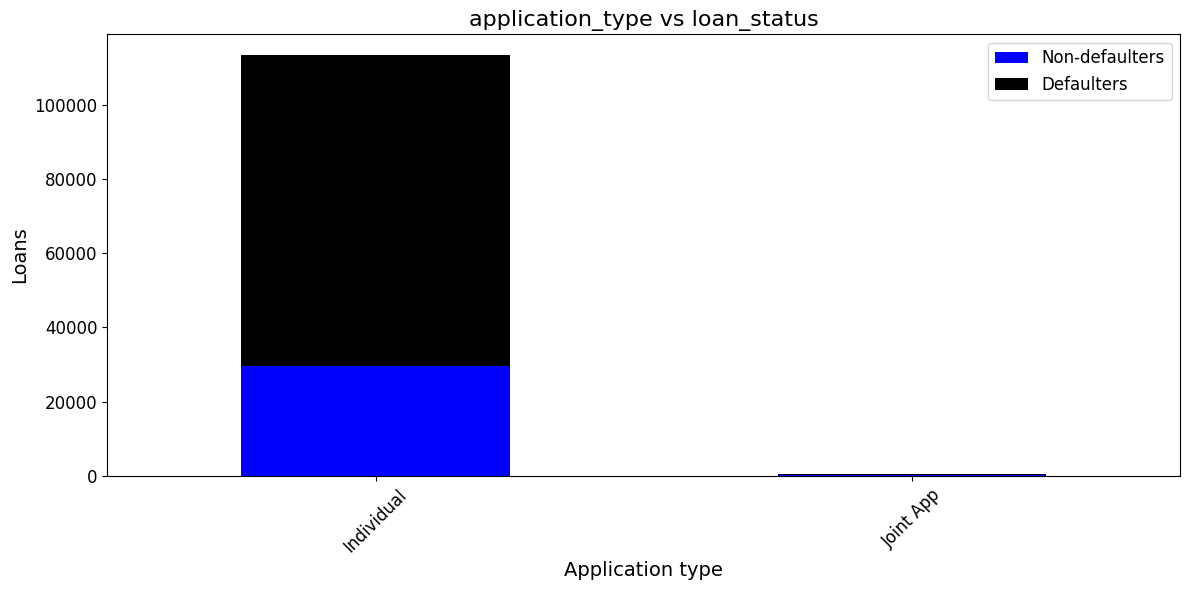

In [71]:
# Count the number of defaulters and non-defaulters for each application_type
status_counts = df.groupby(["application_type", "loan_status"]).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind="bar", stacked=True, color=["blue", "black"], figsize=(12, 6))

# Add labels and title
plt.title("application_type vs loan_status", fontsize=16)           # title
plt.xlabel("Application type", fontsize=14)                         # xlabel
plt.ylabel("Loans", fontsize=14)                                    # ylabel
plt.xticks(rotation=45, fontsize=12)                                # lables/markers on axes of plot
plt.yticks(fontsize=12)                                             # lables/markers on axes of plot
plt.legend(["Non-defaulters", "Defaulters"], fontsize=12)           # legend (on top right corner of plot)
plt.tight_layout()

plt.show()

*verification_status vs loan_status*

<Figure size 1200x800 with 0 Axes>

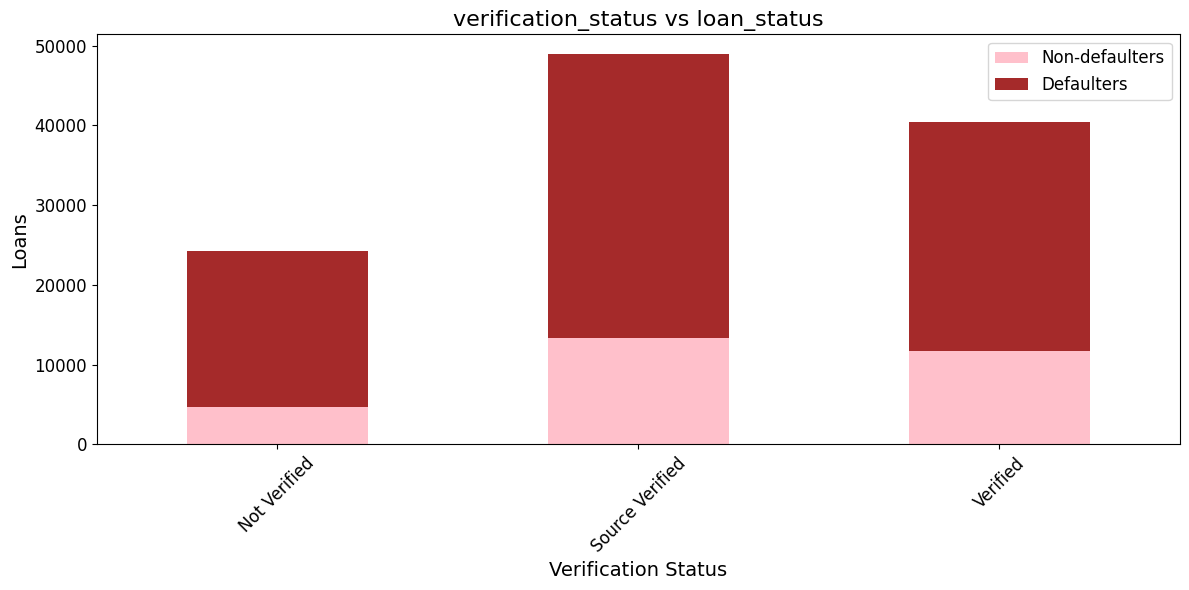

In [72]:
# Count the number of defaulters and non-defaulters for each verification_status
status_counts = df.groupby(["verification_status", "loan_status"]).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind="bar", stacked=True, color=["pink", "brown"], figsize=(12, 6))

# Add labels and title
plt.title("verification_status vs loan_status", fontsize=16)           # title
plt.xlabel("Verification Status", fontsize=14)                         # xlabel
plt.ylabel("Loans", fontsize=14)                                       # ylabel
plt.xticks(rotation=45, fontsize=12)                                   # lables/markers on axes of plot
plt.yticks(fontsize=12)                                                # lables/markers on axes of plot
plt.legend(["Non-defaulters", "Defaulters"], fontsize=12)              # legend (on top right corner of plot)
plt.tight_layout()

plt.show()

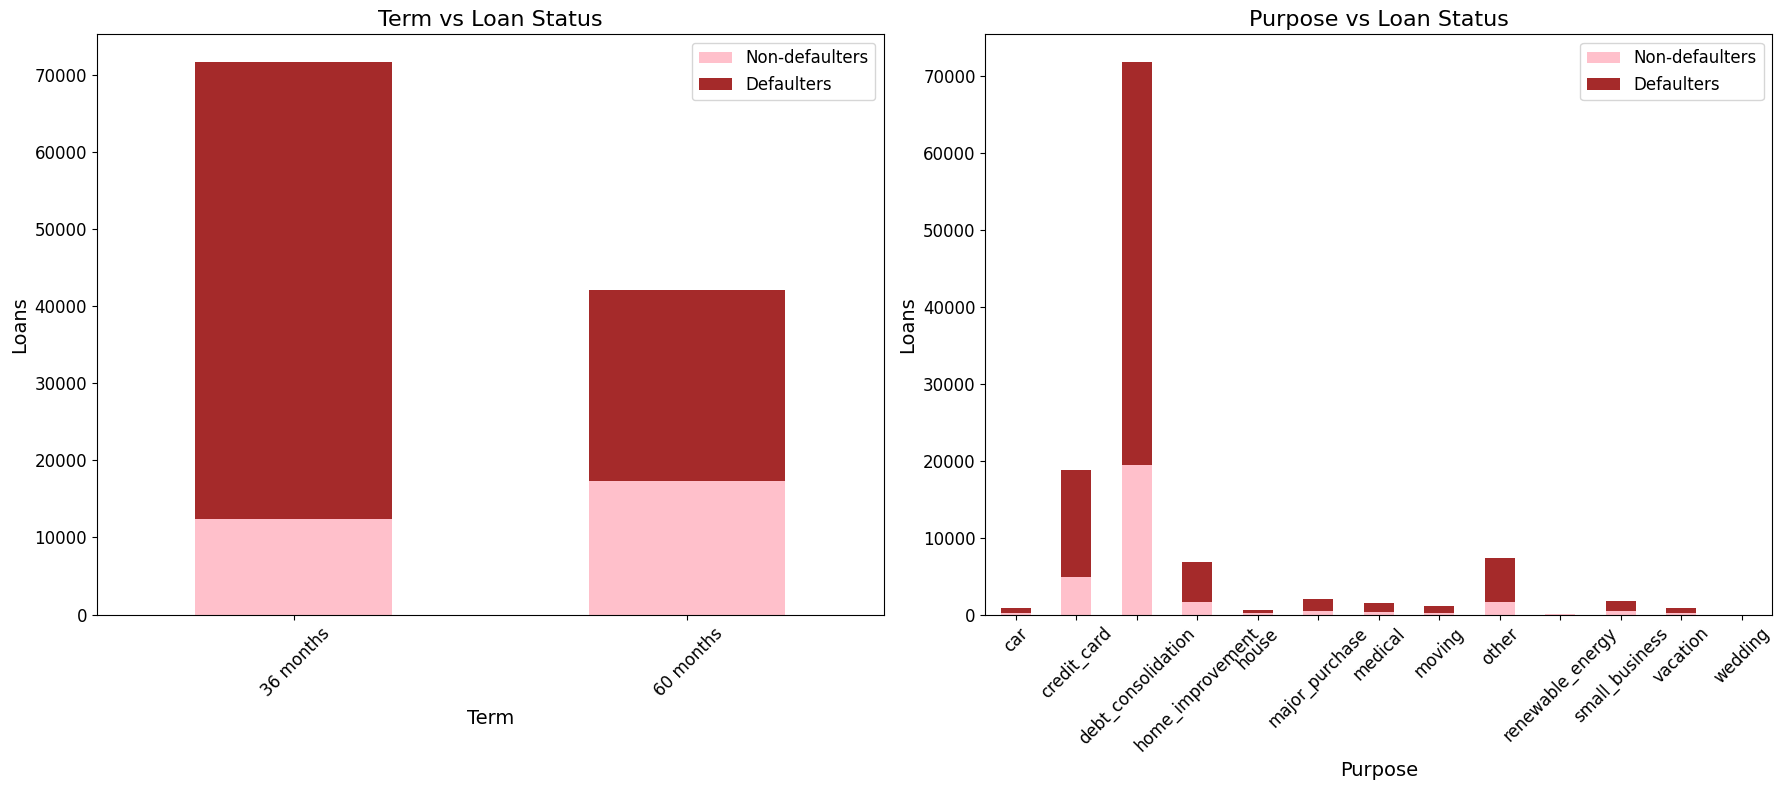

In [73]:

# Count the number of defaulters and non-defaulters for each term and purpose
term_counts = df.groupby(["term", "loan_status"]).size().unstack(fill_value=0)
purpose_counts = df.groupby(["purpose", "loan_status"]).size().unstack(fill_value=0)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Adjust the width of the subplots individually
fig.subplots_adjust(wspace=0.3)

# Plot term vs loan_status
term_counts.plot(kind="bar", stacked=True, color=["pink", "brown"], ax=axes[0])
axes[0].set_title("Term vs Loan Status", fontsize=16)
axes[0].set_xlabel("Term", fontsize=14)
axes[0].set_ylabel("Loans", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(["Non-defaulters", "Defaulters"], fontsize=12)

# Plot purpose vs loan_status
purpose_counts.plot(kind="bar", stacked=True, color=["pink", "brown"], ax=axes[1])
axes[1].set_title("Purpose vs Loan Status", fontsize=16)
axes[1].set_xlabel("Purpose", fontsize=14)
axes[1].set_ylabel("Loans", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(["Non-defaulters", "Defaulters"], fontsize=12)


plt.tight_layout()
plt.show()


Now as we have completed with our visualizations and analysis lets move to make our data ready for training the model.


*   So lets start with checking presence of missing values.
*   If we didn't perform this step it negatively impact our model



In [74]:
null_counts = df.isnull().sum()     # checking for missing values
null_counts

transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64

Ok, great! from this we understood that there are no missing values in our dataset.

Now lets check for ouliers


*   for outliers detection we are using Z-Score
*   Z-Score is a statistical method which tells us how many standard deviations a data point is from the mean.
*   The threshold we are using is 3 because it is most often used.
*   Here we are using scipy package for calculating z-score.





In [75]:
from scipy import stats
import numpy as np

numerical_cols = list(df.select_dtypes(include=["number"]))
print(numerical_cols)
outliers_zscore = {}
threshold = 3
for col in numerical_cols:
  # Calculate z-scores
  z_scores = np.abs(stats.zscore(df[col]))

  # Detect outliers
  outliers = df[z_scores > threshold]

  outliers_zscore[col] = {
      'total_outliers': len(outliers),
      'percentage': (len(outliers) / len(df)) * 100
  }

print(outliers_zscore)

['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length', 'loan_status']
{'cibil_score': {'total_outliers': 1816, 'percentage': 1.597115342333231}, 'total_no_of_acc': {'total_outliers': 1528, 'percentage': 1.343828327690075}, 'annual_inc': {'total_outliers': 904, 'percentage': 0.7950397959632381}, 'int_rate': {'total_outliers': 1636, 'percentage': 1.4388109581812585}, 'loan_amnt': {'total_outliers': 0, 'percentage': 0.0}, 'installment': {'total_outliers': 593, 'percentage': 0.5215249989006641}, 'account_bal': {'total_outliers': 1380, 'percentage': 1.2136669451651203}, 'emp_length': {'total_outliers': 0, 'percentage': 0.0}, 'loan_status': {'total_outliers': 0, 'percentage': 0.0}}


From the Z-Score we got following results:


*   total_no_of_acc : 1.34 % outliers
*   cibil_score : 1.60 % outliers
*   int_rate : 1.44 % outliers
*   total_no_of_acc : 1.34 % outliers
*   account_bal : 1.21 % outliers
*   annual_inc : 0.80 % outliers
*   installment : 0.52 % outliers
*   loan_amnt : 0 % ouliers
*   emp_length : 0 % outliers
*   loan_status : 0 % outliers

So now lets remove the ouliers.











In [76]:
# Remove outliers
for col in numerical_cols:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[col]))

    # Remove rows with Z-score > 3
    df = df[z_scores <= 3]

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)

Now lets check if outliers are removed or not using *df.info()*

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105759 entries, 0 to 105758
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     105759 non-null  datetime64[ns]
 1   sub_grade            105759 non-null  object        
 2   term                 105759 non-null  object        
 3   home_ownership       105759 non-null  object        
 4   cibil_score          105759 non-null  int64         
 5   total_no_of_acc      105759 non-null  int64         
 6   annual_inc           105759 non-null  float64       
 7   int_rate             105759 non-null  float64       
 8   purpose              105759 non-null  object        
 9   loan_amnt            105759 non-null  int64         
 10  application_type     105759 non-null  object        
 11  installment          105759 non-null  float64       
 12  verification_status  105759 non-null  object        
 13  account_bal   

you can clearly see that number of rows have been reduced form
*113705 --> 105759*



*   After careful observation we can also notice that *transaction_date* is also not useful for us in model training.
*   So we can also remove *transaction_date*



In [79]:
df = df.drop(columns=["transaction_date"])     # to drop transaction_date

In [82]:
df.to_csv("train_data_cleaned.csv")



*   Now our data is ready for preprocessing and training steps.
*   Further preprocessing, training , validation and prediction steps are in "*model.py*" file


Thankyou !

